# Важные понятия


**Генеральная совокупность** — это полный набор всех элементов, которые исследуют в рамках задачи

**Выборка** — это отдельный набор элементов, отобранных из генеральной совокупности некоторым случайным процессом

Выборка должна обладать следующими свойствами:
- Репрезентативность
- Достаточный размер выборки
- Нет исследовательских ошибок
- Способ отбора выборки должен быть случайным


**Случайная величина**
- это переменная, значение которой можно узнать только в результате проведения измерения/эксперимента.

- или переменная, значение которой определяется случайными факторами и которая может принимать разные значения с определёнными вероятностями)

Бывают `непрерывными`(может принимать любое значение внутри определённого интервала) и `дискретными` (может принимать только определённые значения)

**Вероятность события** — это отношение числа случаев, когда событие произошло, к общему числу испытаний или наблюдений


**Функция плотности  вероятности (PDF, Probability Density Function)**, является  функцией, которая описывает вероятностное распределение случайной величины. `PDF` определяет вероятность того, что случайная величина примет определенное значение (для `дискретных` переменных) или попадет в определенный интервал (для `интервальных` переменных). То есть, чем больше значение PDF в какой-то точке, тем вероятнее то, что случайная величина примет значение близкое к этой точке.

 **Свойства функции плотности вероятности:**
- Если взять всю площадь под графиком функции плотности вероятности, то получится 1
- Значения функции плотности вероятности всегда больше или равны нулю.


**Функция распределения (CDF, Cumulative Distribution Function)** определяет вероятность того, что случайная величина примет значение, меньшее или равное заданному. Считается как F(x) = P(X<=x)
Значение CDF в точке x показывает вероятность того, что случайная величина будет меньше или равна x.


**PPF (Percent Point Function)**, также известная как квантильная функция или обратная функция распределения, - это функция, обратная к функции распределения (CDF) случайной величины. PPF принимает вероятность в качестве входного параметра и возвращает значение случайной величины, при котором CDF этой случайной величины равна заданной вероятности.






## Загрузка библиотек

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import random

from scipy.stats import norm, binom, uniform

import scipy
import scipy.stats as stats

import matplotlib.pyplot as plt
from itertools import product

import seaborn as sns
from matplotlib import rcParams

import statsmodels


In [6]:
# задаем настройки среды визуализации

rcParams['figure.figsize'] = 8,4
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

sns.set_style("whitegrid")
sns.set(font_scale=1)

## пример для дискретной случайной величины

In [3]:
outcomes = list(product(["Орел", "Решка"], repeat=3))
outcomes

[('Орел', 'Орел', 'Орел'),
 ('Орел', 'Орел', 'Решка'),
 ('Орел', 'Решка', 'Орел'),
 ('Орел', 'Решка', 'Решка'),
 ('Решка', 'Орел', 'Орел'),
 ('Решка', 'Орел', 'Решка'),
 ('Решка', 'Решка', 'Орел'),
 ('Решка', 'Решка', 'Решка')]

In [4]:
len(outcomes)

8

In [5]:
type(outcomes)

list

In [6]:
outcomes[3].count("Орел")

1

In [7]:
len(outcomes)

8

случайная величина = {количество выпадения Орла}

0, 1, 2, 3

$p_{0} = \frac {1} {8}$

In [8]:
def probability_distribution_table():
    outcomes = list(product(["Орел", "Решка"], repeat=3))
    distribution = {}
    for outcome in outcomes:
        num_heads = outcome.count("Орел")
        if num_heads in distribution:
          distribution[num_heads] += 1
        else:
          distribution[num_heads] = 1
    total_outcomes = len(outcomes)
    probability_table = {num_heads: count / total_outcomes for num_heads, count in distribution.items()}

    return probability_table

def cumulative_distribution_function(probability_table):
    cumulative_prob = 0
    cumulative_distribution = {}
    for num_heads, probability in sorted(probability_table.items()):
        cumulative_prob += probability
        cumulative_distribution[num_heads] = cumulative_prob

    return cumulative_distribution


In [9]:
# Создание таблицы вероятностей распределения
prob_table = probability_distribution_table()
print("Таблица вероятностей распределения:")
for num_heads, probability in prob_table.items():
    print(f"{num_heads} орлов: {probability:.3f}")

Таблица вероятностей распределения:
3 орлов: 0.125
2 орлов: 0.375
1 орлов: 0.375
0 орлов: 0.125


In [10]:
prob_table

{3: 0.125, 2: 0.375, 1: 0.375, 0: 0.125}

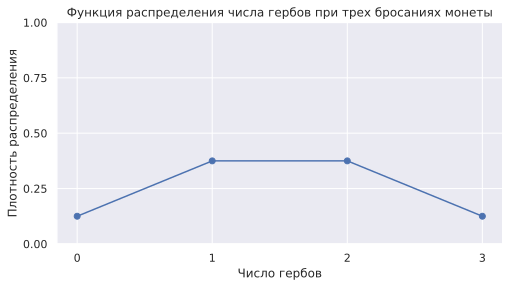

In [11]:
#  График плотности распределения
plt.plot(list(prob_table.keys()), list(prob_table.values()), marker='o', linestyle='-')
plt.xlabel('Число гербов')
plt.ylabel('Плотность распределения')
plt.title('Функция распределения числа гербов при трех бросаниях монеты')
plt.xticks(list(prob_table.keys()))
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
plt.grid(True)
plt.show()

In [12]:
# Создание функции распределения
cumulative_dist = cumulative_distribution_function(prob_table)
print("\nФункция распределения:")
for num_heads, cumulative_prob in sorted(cumulative_dist.items()):
    print(f"≤ {num_heads} герб(ов): {cumulative_prob:.3f}")



Функция распределения:
≤ 0 герб(ов): 0.125
≤ 1 герб(ов): 0.500
≤ 2 герб(ов): 0.875
≤ 3 герб(ов): 1.000


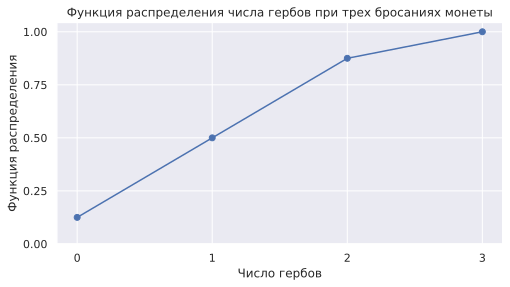

In [13]:
#  График функции распределения
plt.plot(list(cumulative_dist.keys()), list(cumulative_dist.values()), marker='o', linestyle='-')
plt.xlabel('Число гербов')
plt.ylabel('Функция распределения')
plt.title('Функция распределения числа гербов при трех бросаниях монеты')
plt.xticks(list(cumulative_dist.keys()))
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
plt.grid(True)
plt.show()

## пример для непрерывного случая

$\text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt
$ - Функция ошибок

In [14]:
np.linspace(0, 99, 10)

array([ 0., 11., 22., 33., 44., 55., 66., 77., 88., 99.])

x = -1.1818181818181817, cdf = 0.11863892593413922, pdf = 0.19843659696308527
Area under the curve: 0.11735675007514473


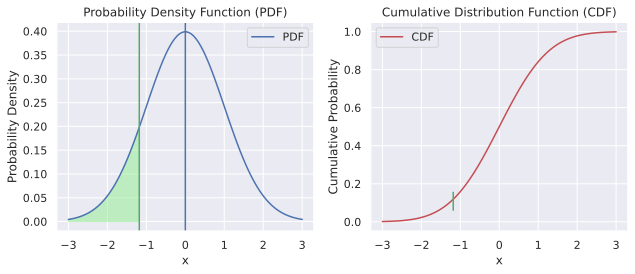

In [15]:
def plot_normal_distribution(mu, sigma):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100) # Создаем массив значений x для процентных точечных значений

    # pdf = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2))
    pdf = norm.pdf(x, mu, sigma)
    # cdf = 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))
    cdf = norm.cdf(x, mu, sigma)

    k = 30
    print(f'x = {x[k]}, cdf = {cdf[k]}, pdf = {pdf[k]}')

    # Рассчитать площадь под зоной до зеленой линии
    area_under_curve = np.trapz(pdf[x <= x[k]], x[x <= x[k]], dx=0.05)
    print(f'Area under the curve: {area_under_curve}')


    plt.figure(figsize=(9, 4))

    plt.subplot(1, 2, 1)
    plt.plot(x, pdf, 'b-', label='PDF')
    plt.title('Probability Density Function (PDF)')
    plt.axvline(x=mu, color='b')

    plt.axvline(x=x[k], color='g')
    plt.fill_between(x[x <= x[k]], pdf[x <= x[k]], color='lightgreen', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, cdf, 'r-', label='CDF')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.axvline(x=x[k], color='g',ymin=0.1, ymax=0.185)
    # plt.axvline(x=norm.ppf(0.25,  mu, sigma), color='g',ymin=0.1, ymax=0.185)

    plt.xlabel('x')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    return cdf[k]


mu = 0
sigma = 1
cdf = plot_normal_distribution(mu, sigma)


cdf = 0.11863892593413922, ppf = -1.1818181818181812


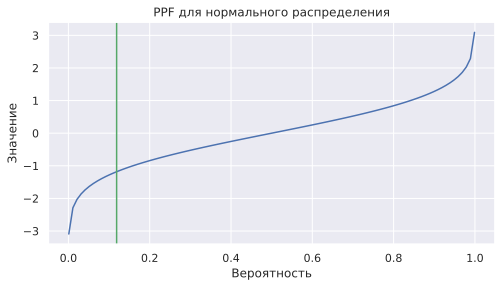

In [16]:
def plot_normal_ppf(mean, std_dev, cdf):
    x = np.linspace(0.001, 0.999, 100)  # Создаем массив значений x для процентных точечных значений
    y = norm.ppf(x, mean, std_dev)  # Вычисляем соответствующие значения процентных точечных значений
    # cdf = 0.1186389
    print(f'cdf = {cdf}, ppf = {norm.ppf(cdf, mean, std_dev)}')

    plt.plot(x, y)  # Строим график процентных точечных значений
    plt.xlabel('Вероятность')
    plt.ylabel('Значение')
    plt.axvline(x=cdf, color='g')
    plt.title('PPF для нормального распределения')
    plt.grid(True)
    plt.show()

# Пример использования
mean = 0  # Среднее значение
std_dev = 1  # Стандартное отклонение
plot_normal_ppf(mean, std_dev, cdf)

в задачах известно распределение вероятности, задана вероятность и нужно найти значение x, при котором F(x) примет именно такое значение.

In [17]:
print(norm.ppf(0.95))
print(norm.cdf(1.6448536269514722))
print(norm.pdf(1.6448536269514722))


1.6448536269514722
0.95
0.10313564037537139


# Примеры распределений. Равномерное распределение

In [18]:
# равномерное распределение
u = uniform()
y = u.rvs(size=1000)
x = np.linspace(0,1, 1000)

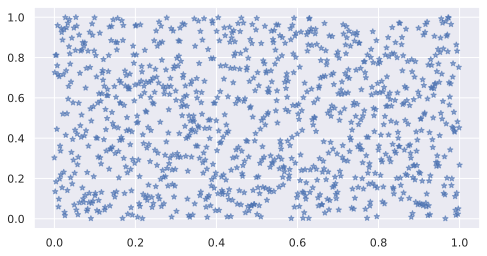

In [19]:
plt.plot(x, y, '*', lw=5, alpha=0.6, label='uniform')
plt.show()

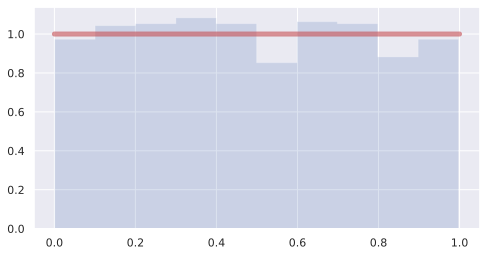

In [20]:
# probability density function
plt.plot(x, u.pdf(x),'r-', lw=5, alpha=0.6, label='uniform')
plt.hist(u.rvs(size=1000), density=True, histtype='stepfilled', alpha=0.2)
plt.show()

# Нормальное распределение

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

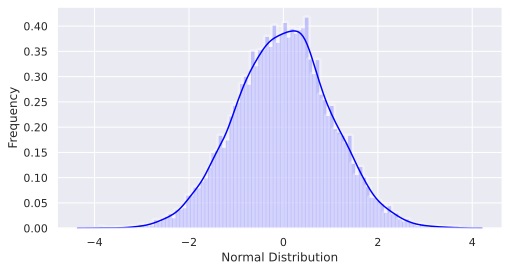

In [21]:
from scipy.stats import norm
data_normal = norm.rvs(size=10000,loc=0,scale=1)
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 5,'alpha':0.3})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')



Типичные распределения вероятности: шпаргалка data scientist-а -


https://habr.com/ru/post/331060/

# Тесты на нормальность

In [22]:
np.random.seed(0)

y = [np.random.normal() for i in range(1000)]

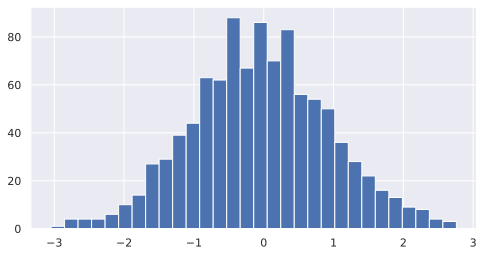

In [23]:
# 1. строим гистограмму
plt.hist(y, bins=30)
plt.show()

2. визуальное сравнение расположения квантилей распределения. QQ - plot

График позволяет сравнить квантили (процентные точки) наблюдаемых данных с квантилями, которые ожидаются в соответствии с теоретическим распределением.


график Q-Q не дает окончательного доказательства о том, что данные точно соответствуют нормальному распределению.


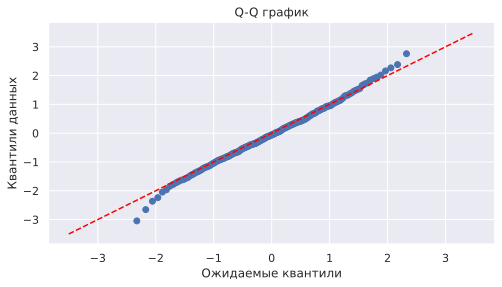

In [24]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Вычислим квантили для данных и ожидаемые квантили нормального распределения
quantiles = np.percentile(y, np.linspace(0, 100, num=200))
expected_quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, num=200))

# Построим график Q-Q
plt.scatter(expected_quantiles, quantiles)
plt.plot([-3.5, 3.5], [-3.5, 3.5], color='red', linestyle='--')
plt.xlabel('Ожидаемые квантили')
plt.ylabel('Квантили данных')
plt.title('Q-Q график')
plt.show()


3. Критерий асимметрии и эксцесса [link](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8_%D0%B8_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0)


Если распределение нормально, то его коэффициент асимметрии $\alpha_3=0$ и коэффициент эксцесса  $\alpha_4=3$.

Но так как значения $\alpha_3=0$ и $\alpha_4=3$ могут иметь место и для распределений, отличных от нормального, то этот **критерий следует воспринимать как критерий установления отклонения от нормальности распределения, но не установления нормальности.**

In [25]:
from scipy.stats import skew, kurtosis
# Рассчитаем коэффициент асимметрии и эксцесс
skewness = skew(y)
kurt = kurtosis(y)

print("Коэффициент асимметрии:", skewness)
print("Коэффициент эксцесса:", kurt)

Коэффициент асимметрии: 0.03385895323565712
Коэффициент эксцесса: -0.0467663244783294


3. [Тест Шапиро-Уилка](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE-%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0#:~:text=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9%20%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE%2D%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0%20%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%20%D0%BD%D0%B0,%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%20%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D1%8F%20%D0%B8%D0%BC%D0%B5%D0%B5%D1%82%20%D0%B2%D0%B8%D0%B4%3A&text=%D0%A7%D0%B8%D1%81%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%20%D1%8F%D0%B2%D0%BB%D1%8F%D0%B5%D1%82%D1%81%D1%8F%20%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%BC%20%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B8%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B3%D0%BE%20%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%9B%D0%BB%D0%BE%D0%B9%D0%B4%D0%B0.)


H0: образец имеет гауссовское распределение

H1: образец не имеет гауссовского распределения.


p-value — это вероятность получения такого же или более экстремального значения статистики, если распределение все же нормальное .

Обычно считается, что если p-value меньше порогового значения уровня значимости
α=0.05, то нулевую гипотезу (гипотезу по-умолчанию, что распределение нормальное) можно отвергать.

In [26]:
from scipy.stats import shapiro
stat, p = shapiro(y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05: #5%
    print('Normal')
else:
    print('not Normal')

stat=0.999, p=0.592
Normal


K ^ 2 Test Д’Агостино

[ссылка на код](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

Проверяет, имеет ли образец данных гауссово распределение.


H0: образец имеет гауссовское распределение

H1: образец не имеет гауссовского распределения

In [27]:
from scipy.stats import normaltest
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Normal')
else:
    print('not Normal')

stat=0.233, p=0.890
Normal


**Тест Колмогорова-Смирнова для проверки формы распределения**

При помощи этого теста по выбору можно проверить, соответствует ли реальное распределение переменной нормальному (Гауса), равномерному, экспоненциальному распределению или распределению Пуассона. Разумеется, самым распространённым видом проверки является проверка наличия нормального распределения.

Теста Колмогорова-Смирнова можно использовать, если выборка независима и однородна



H₀ (нулевая гипотеза): Распределение данных соответствует заданному теоретическому распределению.



Статистика D = max|F(x) - F'(x)|,

где F(x) - эмпирическая функция распределения по выборке данных,
F'(x) - теоретическая функция распределения.


значение D-статистики сравнивается с критическим значением, которое зависит от уровня значимости и размера выборки.


Если значение D-статистики превышает критическое значение, то нулевая гипотеза о соответствии выборки теоретическому распределению отвергается.

In [28]:
from scipy import stats


# Проведение теста Колмогорова-Смирнова на нормальное распределение
kstest_result = stats.kstest(y, 'norm')

# Вывод результатов теста
print('Статистика Колмогорова-Смирнова: ', kstest_result.statistic)
print('p-value: ', kstest_result.pvalue)


Статистика Колмогорова-Смирнова:  0.03737519429804048
p-value:  0.11930823166569182


In [29]:
# Размер выборки
n = len(y)

# Уровень значимости
alpha = 0.05

# Вычисление критического значения
critical_value = stats.ksone.ppf(1 - alpha, n)

# Вывод критического значения
print('Критическое значение:', critical_value)


Критическое значение: 0.038533841268045536


In [30]:
if kstest_result.statistic<critical_value:
    print('Normal')
else:
    print('not Normal')

Normal


здесь много теории  [ссылка](https://ami.nstu.ru/~headrd/seminar/publik_html/guid_normal_tets.pdf)

# Центральная предельная теорема (ЦПТ)

`Википедия:` Класс теорем в теории вероятностей, утверждающих, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

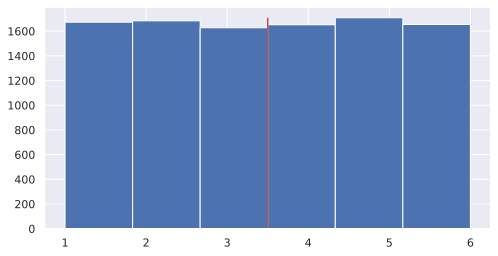

3.5002


In [7]:
# бросаем кубик. Формируем генеральную совокупность
import random
import numpy as np
import matplotlib.pyplot as plt

count = 10000

results = []
for i in range(count):
    results.append(random.randint(1,6))

bins = plt.hist(results, bins=6)
plt.vlines(np.mean(results), ymin=0, ymax=np.max(bins[0]), colors='r', )
plt.show()

print(np.mean(results))

In [13]:
np.random.choice(results,10)

array([2, 5, 6, 5, 4, 1, 3, 3, 5, 3])

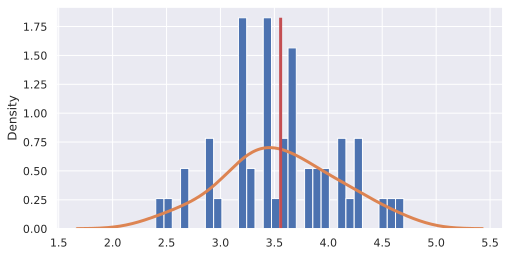

3.5579999999999994


In [16]:
# считаем среднее значение по выборкам
count = 50
n_selected = 10
res_mean = []
for i in range(count):
    res_mean.append(np.mean(np.random.choice(results,n_selected)))

bins = plt.hist(res_mean, bins=30, density=True,)
sns.kdeplot(res_mean, lw=3)
plt.vlines(np.mean(res_mean), ymin=0, ymax=np.max(bins[0]),  lw=3, colors='r')
plt.show()
print(np.mean(res_mean))

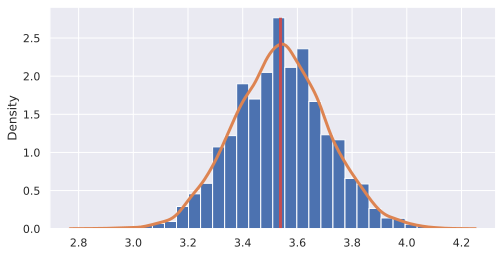

In [33]:
count = 10000
n_selected = 100
res_sum = []
for i in range(count):
    res_sum.append(np.mean(np.random.choice(results,n_selected)))

bins = plt.hist(res_sum, bins=30, density=True)
sns.kdeplot(res_sum, lw=3)
plt.vlines(np.mean(res_sum), ymin=0, ymax=np.max(bins[0]), lw=3,  colors='r')
plt.show()

In [34]:
np.mean(res_sum)

3.5381940000000003

In [35]:
np.var(res_sum)

0.029062538364

# Тестирование статистических гипотез

H0: Система лояльности магазина не изменила средний чек, то есть $\mu$ = 18
<br>H1: Система лояльности магазина  изменила средний чек, то есть $\mu$ != 18


В интернет-магазине  в среднем клиент тратил 18р на покупку.

Интернет-магазин решил ввести систему лояльности на 100 пользователях. Были получены следующие результаты: средний чек увеличился до 19 при стандартном отклонении равном 5.

Какой вывод можно сделать, основываясь на этих данных?


In [19]:
M = 18

# новый тест
n = 100
x = 19
sd = 5


In [20]:
alfa = 0.05

In [21]:
#  ошибка выборочного среднего
se = sd/(n**(1/2))


In [39]:
import scipy.stats as stats
# определяем критические значения
quantile_1 = stats.norm.ppf(1 - alfa/2, M, se)
quantile_2 = stats.norm.ppf(alfa/2, M, se)


In [40]:
# для односторонней гипотезы
# quantile = stats.norm.ppf(1-alfa, M, se)
# quantile

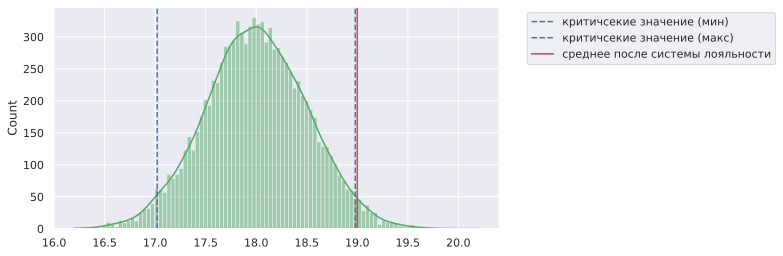

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(np.random.normal(M, se, 10000), bins=100, color='g', kde=True,)

plt.axvline(x=quantile_1, color='b', linestyle='--', label = 'критичсекие значение (мин)')
plt.axvline(x=quantile_2, color='b', linestyle='--', label = 'критичсекие значение (макс)')

plt.axvline(x=x, color='r', linestyle='-', label = 'среднее после системы лояльности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Тоже самое но на нормированных величинах , то есть перейдем к z оценкам

In [42]:
z = (x-M)/se
z

2.0

quantile_1 = 1.959963984540054 и quantile_2 = -1.9599639845400545


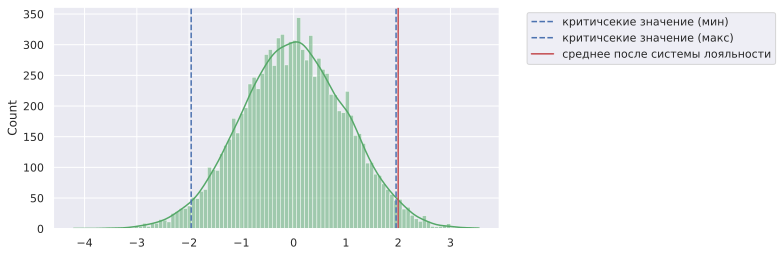

In [43]:
M = 0
se = 1

quantile_1 = stats.norm.ppf(1 - alfa/2, M, se)
quantile_2 = stats.norm.ppf(alfa/2, M, se)

print(f'quantile_1 = {quantile_1} и quantile_2 = {quantile_2}')

sns.histplot(np.random.normal(M, se, 10000), bins=100, color='g', kde=True,)


plt.axvline(x=quantile_1, color='b', linestyle='--', label = 'критичсекие значение (мин)')
plt.axvline(x=quantile_2, color='b', linestyle='--', label = 'критичсекие значение (макс)')

plt.axvline(x=z, color='r', linestyle='-', label = 'среднее после системы лояльности')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


здесь мы сравнивали с критическими значениями, а можно было бы проще.

мы могли бы оценить вероятность получить такие же или ещё более экстремальные данные, если нулевая гипотеза верна?

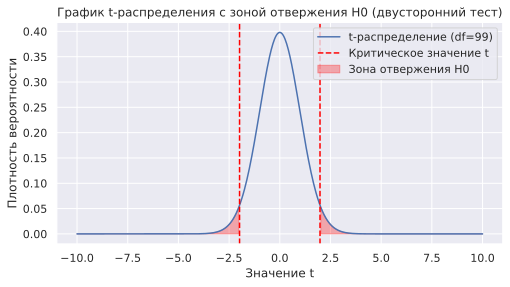

Отвергаем нулевую гипотезу: система лояльности повлияла на средний чек.


In [22]:
# Вычисление t-статистики
t_statistic = abs(x - M) / (sd / (n ** 0.5))

# Уровень значимости
alpha = 0.05

# Вычисление критических значений t
critical_value_left = stats.t.ppf(alpha / 2, df=n - 1)
critical_value_right = stats.t.ppf(1 - alpha / 2, df=n - 1)

# График t-распределения
x_vals = np.linspace(-10, 10, 500)
y_vals = stats.t.pdf(x_vals, df=n - 1)

plt.plot(x_vals, y_vals, label="t-распределение (df=99)")
plt.axvline(x=critical_value_left, color='red', linestyle='dashed', label="Критическое значение t")
plt.axvline(x=critical_value_right, color='red', linestyle='dashed')
plt.fill_between(x_vals[x_vals > critical_value_right], y_vals[x_vals > critical_value_right],
                 color='red',
                 alpha=0.3,
                 label="Зона отвержения H0")
plt.fill_between(x_vals[x_vals < critical_value_left], y_vals[x_vals < critical_value_left],
                 color='red',
                 alpha=0.3)

plt.xlabel("Значение t")
plt.ylabel("Плотность вероятности")
plt.title("График t-распределения с зоной отвержения H0 (двусторонний тест)")
plt.legend()
plt.grid(True)
plt.show()

# Проверка статистической значимости
if t_statistic < critical_value_left or t_statistic > critical_value_right:
    print("Отвергаем нулевую гипотезу: система лояльности повлияла на средний чек.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимых изменений в среднем чеке.")


In [23]:
t_statistic

2.0

In [25]:
critical_value_right

1.9842169515086827

In [46]:
# Вычисление двустороннего p-значения
p_value = 2 * (1 - stats.t.cdf(t_statistic, df=n - 1))
print(f'p_value={p_value}')
# Уровень значимости
alpha = 0.05

# Проверка статистической значимости на основе p-значения
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: система лояльности повлияла на средний чек.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимых изменений в среднем чеке.")


p_value=0.0
Отвергаем нулевую гипотезу: система лояльности повлияла на средний чек.


# Тесты на сравнение средних

H0: Среднее выборки a равно среднему выборки b
<br>H1: Среднее выборки а не равно среднему выборки b

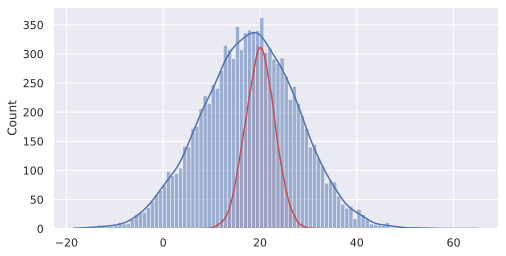

In [ ]:
a = np.random.normal(20, 3, 10000)
b = np.random.normal(18, 10, 10000)

sns.histplot(a, alpha=0.5, bins=100, color='r', kde=True)
sns.histplot(b, alpha=0.5, bins=100, color='b', kde=True)
plt.show()

In [ ]:
scipy.stats.ttest_ind(a, b)

TtestResult(statistic=20.441722420702593, pvalue=6.192314045729636e-92, df=19998.0)

In [ ]:
#задаем уровень статистической значимости 5%

alpha=0.05
results = scipy.stats.ttest_ind(a, b)
print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

6.192314045729636e-92
Отвергаем нулевую гипотезу


# Оценка статистической значимости показателей групп

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


H0: Среднее значение чаевых для женщин равно среднему значению чаевых для мужчин
<br>
H1: Среднее значение чаевых для женщин ***НЕ*** равно среднему значению чаевых для мужчин

In [ ]:
female = df.groupby(['sex']).get_group('Female').tip.values
male = df.groupby(['sex']).get_group('Male').tip.values
male

array([ 1.66,  3.5 ,  3.31,  4.71,  2.  ,  3.12,  1.96,  3.23,  1.71,
        1.57,  3.  ,  3.92,  3.71,  3.35,  4.08,  7.58,  3.18,  2.34,
        2.  ,  2.  ,  4.3 ,  1.45,  2.5 ,  3.27,  3.6 ,  2.  ,  2.31,
        5.  ,  2.24,  2.54,  3.06,  1.32,  5.6 ,  3.  ,  5.  ,  6.  ,
        2.05,  3.  ,  2.5 ,  1.56,  4.34,  3.51,  3.  ,  1.76,  6.73,
        3.21,  2.  ,  1.98,  3.76,  2.64,  3.15,  2.01,  2.09,  1.97,
        1.25,  3.08,  4.  ,  3.  ,  2.71,  3.  ,  3.4 ,  5.  ,  2.03,
        2.  ,  4.  ,  5.85,  3.  ,  3.  ,  3.5 ,  4.73,  4.  ,  1.5 ,
        3.  ,  1.5 ,  1.64,  4.06,  4.29,  3.76,  3.  ,  4.  ,  2.55,
        5.07,  2.31,  2.5 ,  2.  ,  1.48,  2.18,  1.5 ,  2.  ,  6.7 ,
        5.  ,  1.73,  2.  ,  2.5 ,  2.  ,  2.74,  2.  ,  2.  ,  5.  ,
        2.  ,  3.5 ,  2.5 ,  2.  ,  3.48,  2.24,  4.5 , 10.  ,  3.16,
        5.15,  3.18,  4.  ,  3.11,  2.  ,  2.  ,  3.55,  3.68,  5.65,
        3.5 ,  6.5 ,  3.  ,  5.  ,  2.  ,  4.  ,  1.5 ,  2.56,  2.02,
        4.  ,  1.44,

In [ ]:
print(female.mean(), male.mean())

2.8334482758620685 3.0896178343949043


In [ ]:
#задаем уровень статистической значимости 5%

alpha=0.05
# критерйи Стьюдента
results = scipy.stats.ttest_ind(female, male)

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

0.16645623503456755
Не можем отвергнуть нулевую гипотезу


H0: Среднее значение чека для женщин равно среднему значению чека для мужчин
<br>
H1: Среднее значение чека для женщин ***НЕ*** равно среднему значению чека для мужчин

In [ ]:
female = df.groupby(['sex']).get_group('Female').total_bill.values
male = df.groupby(['sex']).get_group('Male').total_bill.values

print(female.mean(), male.mean())

18.056896551724133 20.744076433121016


In [ ]:
#задаем уровень статистической значимости 5%

alpha=0.05
results = scipy.stats.ttest_ind(female, male)

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

0.0236116668468594
Отвергаем нулевую гипотезу


In [ ]:
# ?scipy.stats.ttest_ind

In [ ]:
#задаем уровень статистической значимости 5%

alpha=0.05
results = scipy.stats.ttest_ind(female, male, alternative = 'greater')

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

0.9881941665765703
Не можем отвергнуть нулевую гипотезу


In [ ]:
#задаем уровень статистической значимости 5%

alpha=0.05
results = scipy.stats.ttest_ind(female, male, alternative = 'less')

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

0.0118058334234297
Отвергаем нулевую гипотезу
